In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the file from csv into a dataframe
ds=pd.read_csv('Agriculture_train.csv')
ds

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


We have a dataset based on crops harvested by various farmers at the end of harvest season. Our aim is to develop a model to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.


In [3]:
#lets check the columns
ds.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

### Column Description:-

1. ID - UniqueID
2. Estimated_Insects_Count - Estimated insects count per square meter
3. Crop_Type - Category of Crop(0,1)
4. Soil_Type - Category of Soil(0,1)
5. Pesticide_Use_Category - Type of pesticides uses(1-Never,2-Previously used,3-Currently using)
6. Number_Doses_Week - Number of doses per week
7. Number_Weeks_Used - Number of weeks used
8. Number_Weeks_Quit - Number of weeks quit
9. Season - Season Category(1,2,3)
10. Crop_Damage - Crop Damage Category(0=alive,1=Damage due to other causes,2=Damage due to pesticides)

In [4]:
#lets check the datatypes
ds.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [5]:
#lets check for any missing values
ds.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [6]:
#lets check the distinct values of Number_Weeks_Used
ds['Number_Weeks_Used'].unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65., 67.])

In [7]:
#lets fill the missing datas with most frequent value
ds['Number_Weeks_Used'].replace(np.nan,ds['Number_Weeks_Used'].mode()[0],inplace=True)

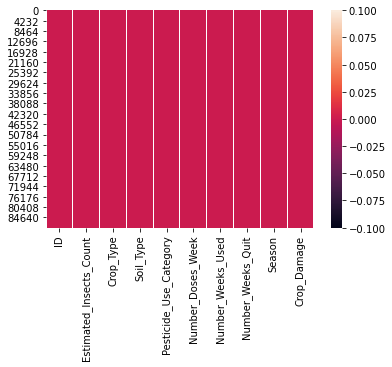

In [8]:
#again check for missing data
sns.heatmap(ds.isnull())

In [9]:
#lets check the summary statistics
ds.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,27.750490,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.032261,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


### Inference
1. The Mean is greater than median for all columns except Season,hence we can see a little bit of positive skewness in them.
2. The minimum insects count is 150 and the maximum is 4097.
3. There is high standard deviation for Number weeks quit.
4. we can see a difference gap between the 75th percentile and max value of insect counts. So there is a chance that it may have outlier datas. 

In [10]:
#lets find the correlation
ds.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.404464,0.299279,0.002304,0.202888
Crop_Type,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.041473,-0.233394,0.002161,-0.016495
Soil_Type,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.063444,0.009364,0.002327,-0.021997
Pesticide_Use_Category,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.319399,-0.554169,0.002811,0.175002
Number_Doses_Week,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.116879,-0.037131,-0.001401,-0.030874
Number_Weeks_Used,0.404464,-0.041473,-0.063444,0.319399,0.116879,1.000000,-0.415646,0.003614,0.213591
Number_Weeks_Quit,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.415646,1.000000,0.000595,-0.133117
Season,0.002304,0.002161,0.002327,0.002811,-0.001401,0.003614,0.000595,1.000000,-0.000184
Crop_Damage,0.202888,-0.016495,-0.021997,0.175002,-0.030874,0.213591,-0.133117,-0.000184,1.000000


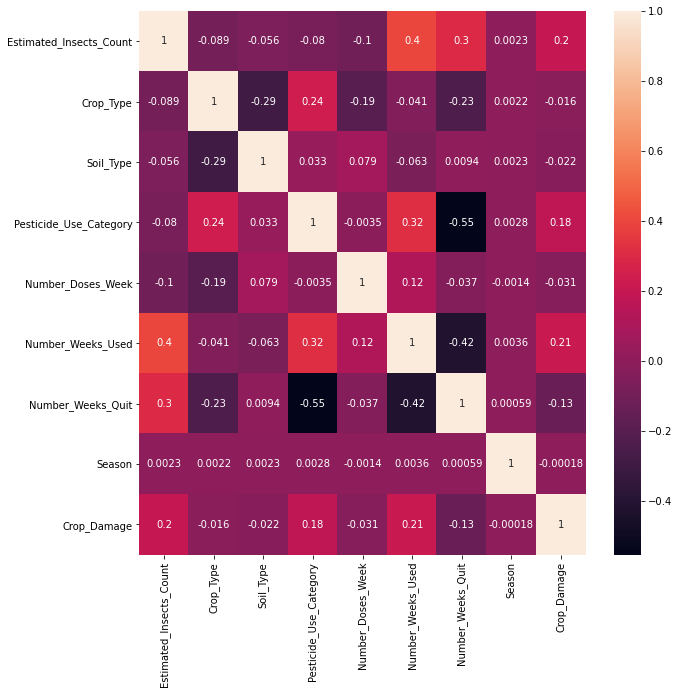

In [11]:
#lets visyualize correlation graphicallly
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(),annot=True)
plt.show()

Our Target variable is showing negative correlation with crop type,soil type,number doses week,number weeks quit and season. That is,these are the factors which shows higher dependancies for the crop to be wealthy.
The factors estimated insects counts,pesticide use category and number weeks used shows positive correlation, As if these factors increases the damage of crops also increases. 

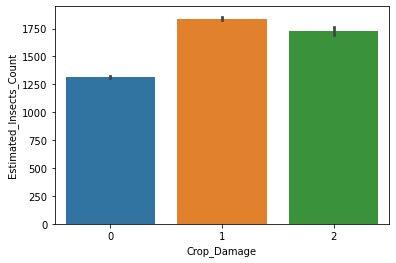

Crop_Damage
0    1315.707387
1    1839.106200
2    1731.111976
Name: Estimated_Insects_Count, dtype: float64


In [12]:
#lets check the damage type of crop with insects count
plt.figure()
sns.barplot(x='Crop_Damage',y='Estimated_Insects_Count',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Estimated_Insects_Count'].mean())

This shows that the healthy crops has the lowest mean count of insects and the crops damaged due to other causes have highest count of insects.

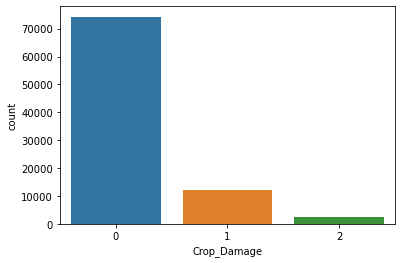

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64


In [13]:
#counts of damage types
plt.figure()
sns.countplot(x='Crop_Damage',data=ds)
plt.show()
print(ds['Crop_Damage'].value_counts())

The maximum number of crops are healthy and the least are those damaged due to pesticides.

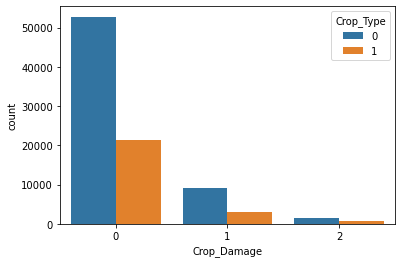

Crop_Damage  Crop_Type
0            0            52778
             1            21460
1            0             9204
             1             3103
2            0             1607
             1              706
Name: Crop_Type, dtype: int64


In [14]:
#crop type against crop damage
plt.figure()
sns.countplot(x='Crop_Damage',hue='Crop_Type',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Crop_Type'].value_counts())

The crop type 0 has the maximum count of healthy crops. Also crop type 0 is the most used type also. Also the damage due to pesticides is the least for both crop types.

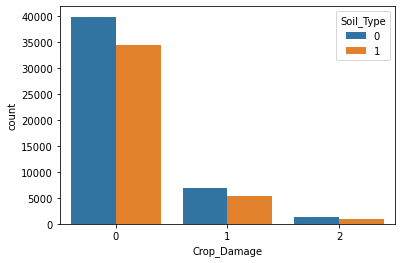

Crop_Damage  Soil_Type
0            0            39841
             1            34397
1            0             6953
             1             5354
2            0             1330
             1              983
Name: Soil_Type, dtype: int64


In [15]:
#soil type against crop damage
plt.figure()
sns.countplot(x='Crop_Damage',hue='Soil_Type',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Soil_Type'].value_counts())

There isnt a large difference between the soil types in terms of healthy crops, though the maximum count is high for wealthy crops in soil type 0.

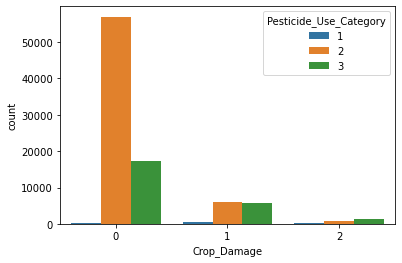

Crop_Damage  Pesticide_Use_Category
0            2                         56958
             3                         17162
             1                           118
1            2                          6072
             3                          5681
             1                           554
2            3                          1469
             2                           679
             1                           165
Name: Pesticide_Use_Category, dtype: int64


In [16]:
#crop damage vs pesticide category
plt.figure()
sns.countplot(x='Crop_Damage',hue='Pesticide_Use_Category',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Pesticide_Use_Category'].value_counts())

Previously used pesticides had a max count for wealthy crops. It is evident that although pesticides has been used more number of wealthy crops are seen. Those crops which are damaged due to pesticides have more count for the currently using pesticides.

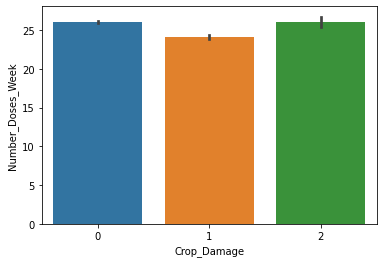

Crop_Damage
0    26.119238
1    24.176079
2    26.113273
Name: Number_Doses_Week, dtype: float64


In [17]:
#crop damage vs Number doses weeks
plt.figure()
sns.barplot(x='Crop_Damage',y='Number_Doses_Week',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Number_Doses_Week'].mean())

The average of number of doses per week is less in the case of damaged crops due to other reasons. 

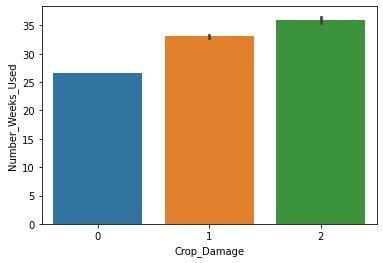

Crop_Damage
0    26.607627
1    33.110262
2    35.913532
Name: Number_Weeks_Used, dtype: float64


In [18]:
#crop damage vs Number_Weeks_Used
plt.figure()
sns.barplot(x='Crop_Damage',y='Number_Weeks_Used',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Number_Weeks_Used'].mean())

The number of weeks used is less in the case of healthy crops whereas it is more for crops damaged due to pesticides. This is evident that number of weeks used leads to more damages in crops. 

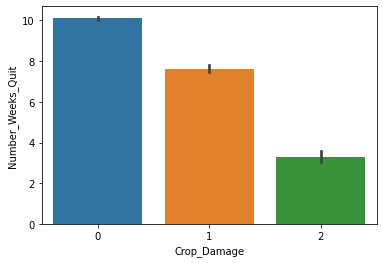

Crop_Damage
0    10.110644
1     7.630698
2     3.303934
Name: Number_Weeks_Quit, dtype: float64


In [19]:
#crop damage vs Number_Weeks_Quit
plt.figure()
sns.barplot(x='Crop_Damage',y='Number_Weeks_Quit',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Number_Weeks_Quit'].mean())

The number of weeks quit was high in the case of healthy crops whereas the lowest number of weeks quit lead to damage of crops due to pesticides.This shows the inverse relationship of weeks quit with the crop damage type, As it was quitted for more weeks the crop was healthy and when it was for less weeks the crop was damaged.

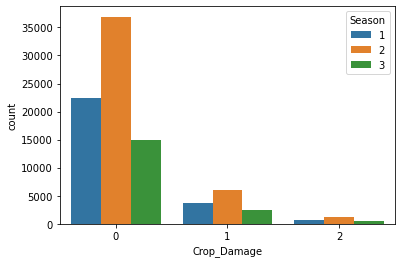

Crop_Damage  Season
0            2         36881
             1         22493
             3         14864
1            2          6115
             1          3748
             3          2444
2            2          1214
             1           661
             3           438
Name: Season, dtype: int64


In [20]:
#season vs crop damage
plt.figure()
sns.countplot(x='Crop_Damage',hue='Season',data=ds)
plt.show()
print(ds.groupby('Crop_Damage')['Season'].value_counts())

It is evident that in the 2 nd season most number of crops were sown. The 3rd season is having the least number of crops sown.


Lets check for outliers

In [21]:
#let us drop the id column since it has no relevance
ds.drop(columns='ID',axis=1,inplace=True)
ds

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
88853,3337,1,0,2,10,12.0,44,3,0
88854,3516,1,0,2,10,20.0,38,1,0
88855,3516,1,0,2,15,40.0,8,2,0
88856,3702,1,0,2,10,25.0,18,3,0


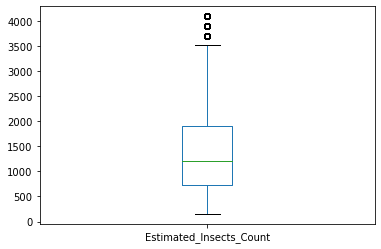

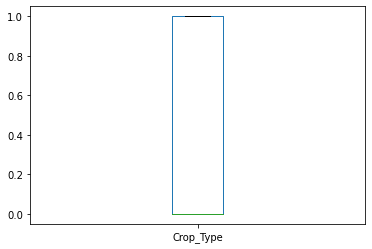

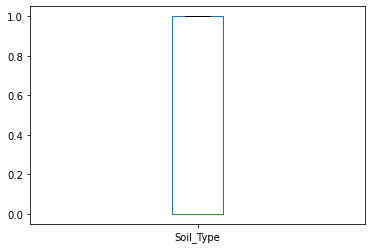

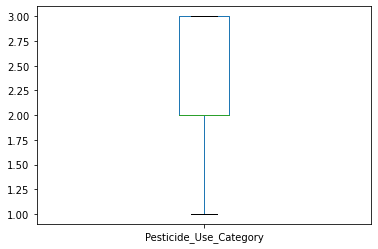

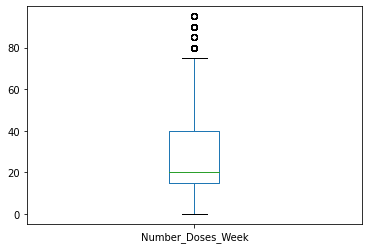

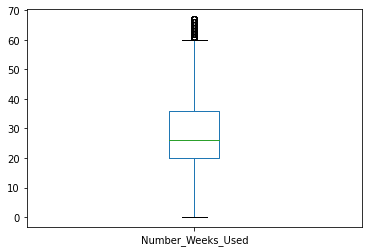

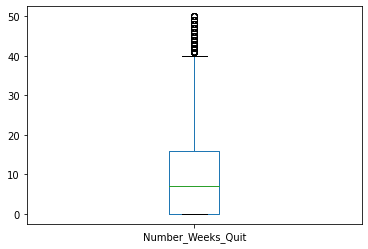

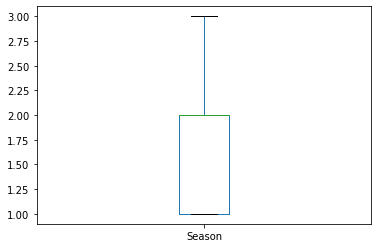

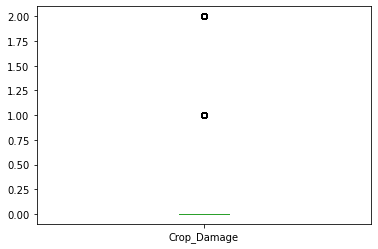

In [22]:
# using boxplot
plt.figure()
for i in ds.columns:
    ds[i].plot.box()
    plt.show()    

They are not outlier datas.Hence we cannot treat them because while treating we get to omit all of our crop_damage type 2 datas.

In [23]:
#lets check for skewness
ds.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.421001
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

Since most of the datas are categorical ones treating skewness for them is not ideal.

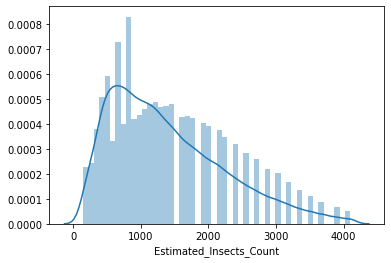

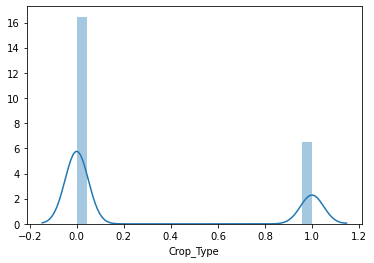

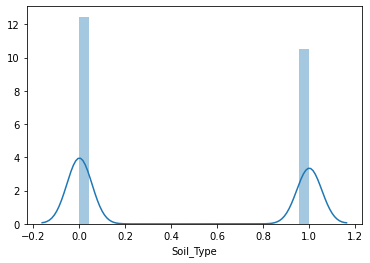

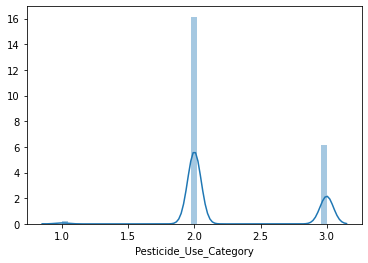

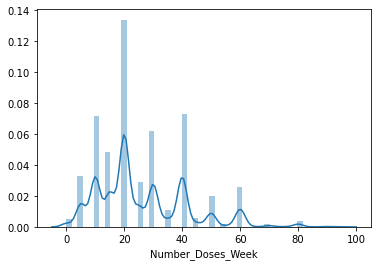

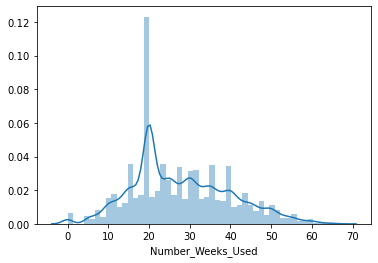

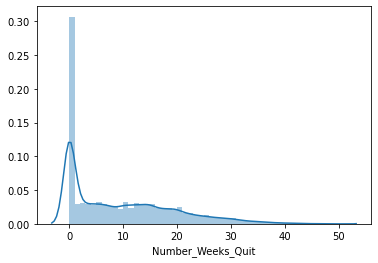

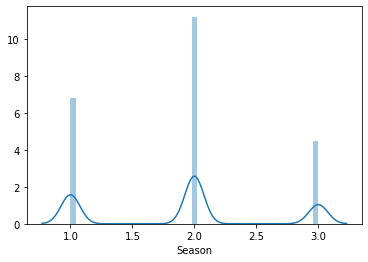

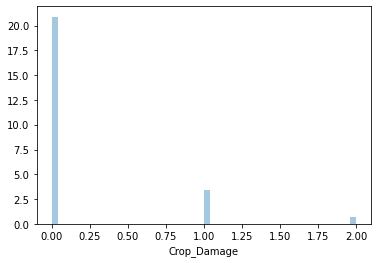

In [24]:
#lets visualise graphically
for i in ds.columns:
    plt.figure()
    sns.distplot(ds[i])
    plt.show()

In [25]:
list=['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Quit']
for i in list:
    ds[i]=np.sqrt(ds[i])

In [26]:
ds.skew()

Estimated_Insects_Count    0.233920
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.057880
Number_Weeks_Used          0.421001
Number_Weeks_Quit          0.015768
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

skewness is reduced to an extent.

## Training the model

In [27]:
y=ds['Crop_Damage']
y

0        0
1        1
2        1
3        1
4        1
        ..
88853    0
88854    0
88855    0
88856    0
88857    0
Name: Crop_Damage, Length: 88858, dtype: int64

In [28]:
ds_x=ds.drop(columns='Crop_Damage',axis=1)
ds_x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,13.711309,1,0,1,0.000000,0.0,0.000000,1
1,14.456832,1,0,1,0.000000,0.0,0.000000,2
2,16.031220,1,0,1,0.000000,0.0,0.000000,2
3,16.031220,1,1,1,0.000000,0.0,0.000000,2
4,18.493242,1,0,1,0.000000,0.0,0.000000,2
...,...,...,...,...,...,...,...,...
88853,57.766772,1,0,2,3.162278,12.0,6.633250,3
88854,59.295868,1,0,2,3.162278,20.0,6.164414,1
88855,59.295868,1,0,2,3.872983,40.0,2.828427,2
88856,60.844063,1,0,2,3.162278,25.0,4.242641,3


In [29]:
#Now we apply Standard Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)
x=pd.DataFrame(x,columns=ds_x.columns)

In [30]:
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-1.940906,1.586343,-0.920021,-2.737701,-3.123897,-2.306353,-1.251140,-1.278962
1,-1.874962,1.586343,-0.920021,-2.737701,-3.123897,-2.306353,-1.251140,0.146924
2,-1.735701,1.586343,-0.920021,-2.737701,-3.123897,-2.306353,-1.251140,0.146924
3,-1.735701,1.586343,1.086932,-2.737701,-3.123897,-2.306353,-1.251140,0.146924
4,-1.517926,1.586343,-0.920021,-2.737701,-3.123897,-2.306353,-1.251140,0.146924
...,...,...,...,...,...,...,...,...
88853,1.955966,1.586343,-0.920021,-0.572116,-1.083801,-1.309029,2.179624,1.572811
88854,2.091220,1.586343,-0.920021,-0.572116,-1.083801,-0.644146,1.937139,-1.278962
88855,2.091220,1.586343,-0.920021,-0.572116,-0.625299,1.018061,0.211742,0.146924
88856,2.228164,1.586343,-0.920021,-0.572116,-1.083801,-0.228594,0.943184,1.572811


In [31]:
#splitting the input and target variable into test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=47)
print(x_train.shape,'\t',x_test.shape)
print(y_train.shape,'\t',y_test.shape)

(62200, 8) 	 (26658, 8)
(62200,) 	 (26658,)


In [32]:
#importing libraries for models and error metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
#creating a for loop for all the models
model=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Metrics:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('END OF THE MODEL----------------------------------- ')
    print('\n')

score of  LogisticRegression() is: 0.8339228295819936
Metrics:
Accuracy Score: 0.8327706504614
Confusion Matrix: [[22003   273     0]
 [ 3520   197     0]
 [  619    46     0]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.99      0.91     22276
           1       0.38      0.05      0.09      3717
           2       0.00      0.00      0.00       665

    accuracy                           0.83     26658
   macro avg       0.41      0.35      0.33     26658
weighted avg       0.76      0.83      0.77     26658

END OF THE MODEL----------------------------------- 


score of  KNeighborsClassifier() is: 0.8638424437299035
Metrics:
Accuracy Score: 0.8284192362517818
Confusion Matrix: [[21250   995    31]
 [ 2860   820    37]
 [  439   212    14]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22276
           1       0.40      0.22      0.29      3

## Ensemble Methods

In [34]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
#by using loop
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Metrics:')
    print('Accuracy Score:',accuracy_score(y_test,predm))
    print('Confusion Matrix:',confusion_matrix(y_test,predm))
    print('Classification Report:',classification_report(y_test,predm))
    print('END OF THE MODEL----------------------------------- ')
    print('\n')

score of  RandomForestClassifier() is: 0.9841479099678456
Metrics:
Accuracy Score: 0.8226048465751369
Confusion Matrix: [[21115  1032   129]
 [ 2813   778   126]
 [  427   202    36]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22276
           1       0.39      0.21      0.27      3717
           2       0.12      0.05      0.08       665

    accuracy                           0.82     26658
   macro avg       0.46      0.40      0.42     26658
weighted avg       0.78      0.82      0.80     26658

END OF THE MODEL----------------------------------- 


score of  AdaBoostClassifier() is: 0.8393247588424437
Metrics:
Accuracy Score: 0.8396728936904494
Confusion Matrix: [[22028   248     0]
 [ 3361   356     0]
 [  561   104     0]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.99      0.91     22276
           1       0.50      0.10      0.16  

Of all the above models Gradient boosting classifier has the highest accuracy score.lets check the cross validation score.

In [36]:
#Gradient Boosting classifier model
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
print('score:',gbc.score(x_train,y_train))
predgbc=gbc.predict(x_test)
print('\n')
print('Accuracy Score:',accuracy_score(y_test,predgbc))
print('Confusion Matrix:',confusion_matrix(y_test,predgbc))
print('Classification Report:',classification_report(y_test,predgbc))

score: 0.8461414790996784


Accuracy Score: 0.8453372346012454
Confusion Matrix: [[21981   295     0]
 [ 3162   554     1]
 [  493   172     0]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.99      0.92     22276
           1       0.54      0.15      0.23      3717
           2       0.00      0.00      0.00       665

    accuracy                           0.85     26658
   macro avg       0.47      0.38      0.38     26658
weighted avg       0.79      0.85      0.80     26658



In [37]:
#cross validating Gradient Boosting classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,x,y,cv=10,scoring='accuracy')
print('Score:',score)
print('Mean Score:',score.mean())
print('Standard Deviation:',score.std())

Score: [0.84728787 0.84458699 0.84548728 0.84469953 0.84469953 0.84267387
 0.84289894 0.84289894 0.84490715 0.84558244]
Mean Score: 0.8445722539904252
Standard Deviation: 0.0013631177373653821


The Gradient Boosting Classifier model is performing well with a mean cross validation score of 0.84 . The model is well fit for this dataset and can be considered as the best model for future predictions.

## Testing dataset

In [38]:
ds_test=pd.read_csv('test_agriculture.csv')
ds_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [39]:
#check for missing datas
ds_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [40]:
#replace the missing values with the previously found mode value -20
ds_test.replace(np.nan,20,inplace=True)

In [41]:
#drop the id column
ds_test.drop(columns='ID',axis=1,inplace=True)

In [42]:
#we have to perform standard scaling
X=sc.transform(ds_test)
X=pd.DataFrame(X,columns=ds_test.columns)

In [43]:
X

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,13.475587,1.586343,1.086932,-2.737701,-3.123897,-0.644146,-1.251140,0.146924
1,33.112325,1.586343,1.086932,-2.737701,-3.123897,-2.306353,-1.251140,0.146924
2,52.218341,1.586343,-0.920021,-2.737701,-3.123897,-2.306353,-1.251140,0.146924
3,61.505988,1.586343,-0.920021,-2.737701,-3.123897,-2.306353,-1.251140,0.146924
4,66.636307,-0.630381,-0.920021,-2.737701,-3.123897,-2.306353,-1.251140,-1.278962
...,...,...,...,...,...,...,...,...
1194,96.975952,-0.630381,1.086932,-0.572116,22.681509,0.519399,2.369310,1.572811
1195,96.975952,-0.630381,1.086932,-0.572116,22.681509,-0.228594,0.300481,-1.278962
1196,96.975952,-0.630381,1.086932,-0.572116,9.778806,-1.225919,10.644624,-1.278962
1197,104.052254,-0.630381,1.086932,-0.572116,3.327454,0.602509,1.334895,-1.278962


In [44]:
#predicting the output
Predictgbc=gbc.predict(X)

In [45]:
#predicted output
pd.DataFrame(Predictgbc)

,0
0,1
1,1
2,1
3,1
4,1
...,...
1194,0
1195,0
1196,0
1197,0


## Saving the model and result

In [46]:
#saving the GBC model
import joblib
joblib.dump(gbc,'Agriculture.pkl')

['Agriculture.pkl']

In [47]:
#saving the output to csv file
pred_OP=pd.DataFrame(Predictgbc)
pred_OP.to_csv('Agriculture_crop_damage_predictions.csv')